In [ ]:
## This will help us to get the ranking of different top universities across the world by analyzing the data.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import datetime as dt
import squarify


In [6]:
data = pd.read_csv('timesdata.csv',encoding='utf-8')

In [7]:
data.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42:58:00,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45:55:00,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57,91.2,"18,812",11.8,34%,46:54:00,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46:54:00,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50:50:00,2011
8,9,Imperial College London,United Kingdom,89.2,90,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50:50:00,2011


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

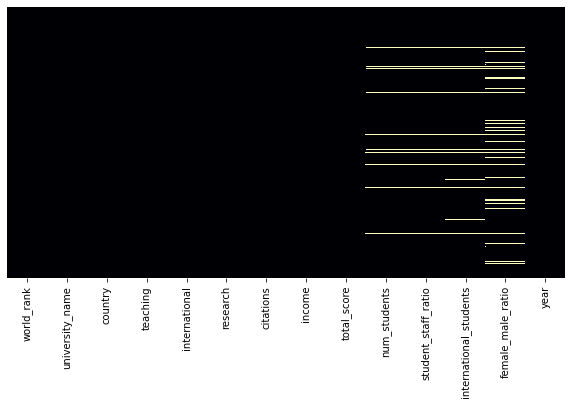

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),cmap='magma',yticklabels=False,cbar=False)
plt.show()

In [10]:
data['female_male_ratio'].unique()

array([nan, '33 : 67', '37 : 63', '42:58:00', '45:55:00', '46:54:00',
       '50:50:00', '52:48:00', '48:52:00', '31 : 69', '51:49:00',
       '39 : 61', '53:47:00', '56:44:00', '49:51:00', '0.888888889',
       '54:46:00', '58:42:00', '47:53:00', '55:45:00', '0.806944444',
       '70:30:00', '44:56:00', '27 : 73', '32 : 68', '62:38:00',
       '57:43:00', '61:39:00', '66:34:00', '30 : 70', '0.602083333',
       '0.847916667', '59:41:00', '25 : 75', '60:40:00', '26 : 74',
       '67:33:00', '41:59:00', '63:37:00', '29 : 71', '35 : 65',
       '28 : 72', '65:35:00', '38 : 62', '34 : 66', '43:57:00', '0.725',
       '64:36:00', '36 : 64', '0.561111111', '0.684027778', '0.765972222',
       '24 : 76', '100:00:00', '40 : 60', '77:23:00', '71:29:00',
       '69:31:00', '0.970833333', '1.011805556', '-', '0.643055556',
       '78:22:00', '76:24:00', '0.929861111', '0.520138889', '68:32:00',
       '0.110416667', '74:26:00', '0.438194444'], dtype=object)

In [11]:
data['num_students'].unique()

array(['20,152', '2,243', '11,074', '15,596', '7,929', '18,812', '19,919',
       '36,186', '15,060', '11,751', '38,206', '14,221', '15,128',
       '21,424', '18,178', '41,786', '66,198', '25,055', '20,376',
       '11,885', '19,835', '26,607', '44,020', '15,172', '18,334',
       '26,199', '19,967', '3,055', '22,020', '50,152', '26,518',
       '27,233', '42,727', '31,592', '31,326', '40,128', '40,148',
       '12,528', '2,429', '25,774', '11,385', '2,400', '14,604', '7,774',
       '25,581', nan, '6,333', '9,666', '26,614', '14,290', '12,161',
       '46,825', '10,410', '35,364', '8,653', '56,959', '22,809',
       '39,763', '24,789', '42,056', '12,338', '35,691', '11,829',
       '26,485', '9,259', '51,462', '29,325', '17,906', '17,404', '6,753',
       '41,868', '23,845', '20,771', '36,534', '7,867', '15,521',
       '21,394', '21,908', '9,027', '12,001', '34,718', '28,881',
       '25,674', '15,489', '34,938', '8,747', '28,251', '20,925',
       '26,583', '7,326', '23,823', '22,1

In [12]:
data[data['num_students'].isnull()]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
45,43,University of Wisconsin,United States of America,55.5,43.7,64.6,83.4,-,67,NaN,NaN,NaN,NaN,2011
81,81,University of York,United Kingdom,47.9,66.6,46.2,81.9,36.2,59.1,NaN,NaN,NaN,NaN,2011
85,86,London School of Economics and Political Science,United Kingdom,62.4,99.5,56.2,51.6,38.4,58.3,NaN,NaN,NaN,NaN,2011
111,112,Bilkent University,Turkey,34.3,47.7,36.1,95.7,32.4,55.4,NaN,NaN,NaN,NaN,2011
115,115,University of Hawai’i at Mānoa,United States of America,38.3,34.2,47.6,81.0,-,55.2,NaN,NaN,NaN,NaN,2011
157,158,Georgia Health Sciences University,United States of America,67.3,16.3,41.7,48.9,50.1,50.7,NaN,NaN,NaN,NaN,2011
246,47,London School of Economics and Political Science,United Kingdom,66.4,96,75.4,50.6,41.1,66,NaN,NaN,NaN,NaN,2012
321,121,University of York,United Kingdom,36.7,72.7,38.8,71.6,33.9,50.4,NaN,NaN,NaN,NaN,2012
361,162,Medical University of South Carolina,United States of America,43.9,23.9,38.9,56.6,87.8,45.8,NaN,NaN,NaN,NaN,2012
396,197,Georgia Health Sciences University,United States of America,49.0,32.1,14.2,63.5,40.7,41.5,NaN,NaN,NaN,NaN,2012


In [13]:
data.shape

(2603, 14)

In [14]:
data.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [15]:
data.dropna(inplace=True)

In [16]:
data.shape

(2362, 14)

In [17]:
data["num_students"]= data["num_students"].apply(lambda x:(str(x).replace(",","")))

In [18]:
data = data[data['num_students']!='others']
data['num_students']=pd.to_numeric(data['num_students'])

In [19]:
data['female_male_ratio'].unique()

array(['33 : 67', '37 : 63', '42:58:00', '45:55:00', '46:54:00',
       '50:50:00', '52:48:00', '48:52:00', '31 : 69', '51:49:00',
       '39 : 61', '53:47:00', '56:44:00', '49:51:00', '0.888888889',
       '54:46:00', '58:42:00', '47:53:00', '55:45:00', '0.806944444',
       '70:30:00', '44:56:00', '27 : 73', '32 : 68', '62:38:00',
       '57:43:00', '61:39:00', '66:34:00', '30 : 70', '0.602083333',
       '0.847916667', '59:41:00', '25 : 75', '60:40:00', '26 : 74',
       '67:33:00', '41:59:00', '63:37:00', '29 : 71', '35 : 65',
       '28 : 72', '65:35:00', '38 : 62', '34 : 66', '43:57:00', '0.725',
       '64:36:00', '36 : 64', '0.561111111', '0.684027778', '0.765972222',
       '24 : 76', '100:00:00', '40 : 60', '77:23:00', '71:29:00',
       '69:31:00', '0.970833333', '1.011805556', '0.643055556', '-',
       '78:22:00', '76:24:00', '0.929861111', '0.520138889', '68:32:00',
       '0.110416667', '74:26:00', '0.438194444'], dtype=object)

In [20]:
## TO ANSWER OUR FIRST QUESTION i.e Top universities with best teaching skills

topfiftyuniv =[]
for univ in data['university_name'].unique():
    df = data[data['university_name']==univ]
    sum=np.sum(df['teaching'])
    topfiftyuniv.append([univ,sum])
univ = pd.DataFrame(topfiftyuniv,columns=['Top University','teaching skills'])
univ.sort_values(by='teaching skills',ascending=False,inplace=True)

In [21]:
univ

,Top University,teaching skills
0,California Institute of Technology,571.9
2,Stanford University,566.8
1,Massachusetts Institute of Technology,554.8
8,Yale University,542.1
4,University of Cambridge,540.7
...,...,...
638,I-Shou University,12.8
578,American University of Sharjah,12.4
579,Anadolu University,12.2
596,"California State University, Long Beach",11.6


In [22]:
data.shape

(2362, 14)

In [23]:
univ = univ[:51]

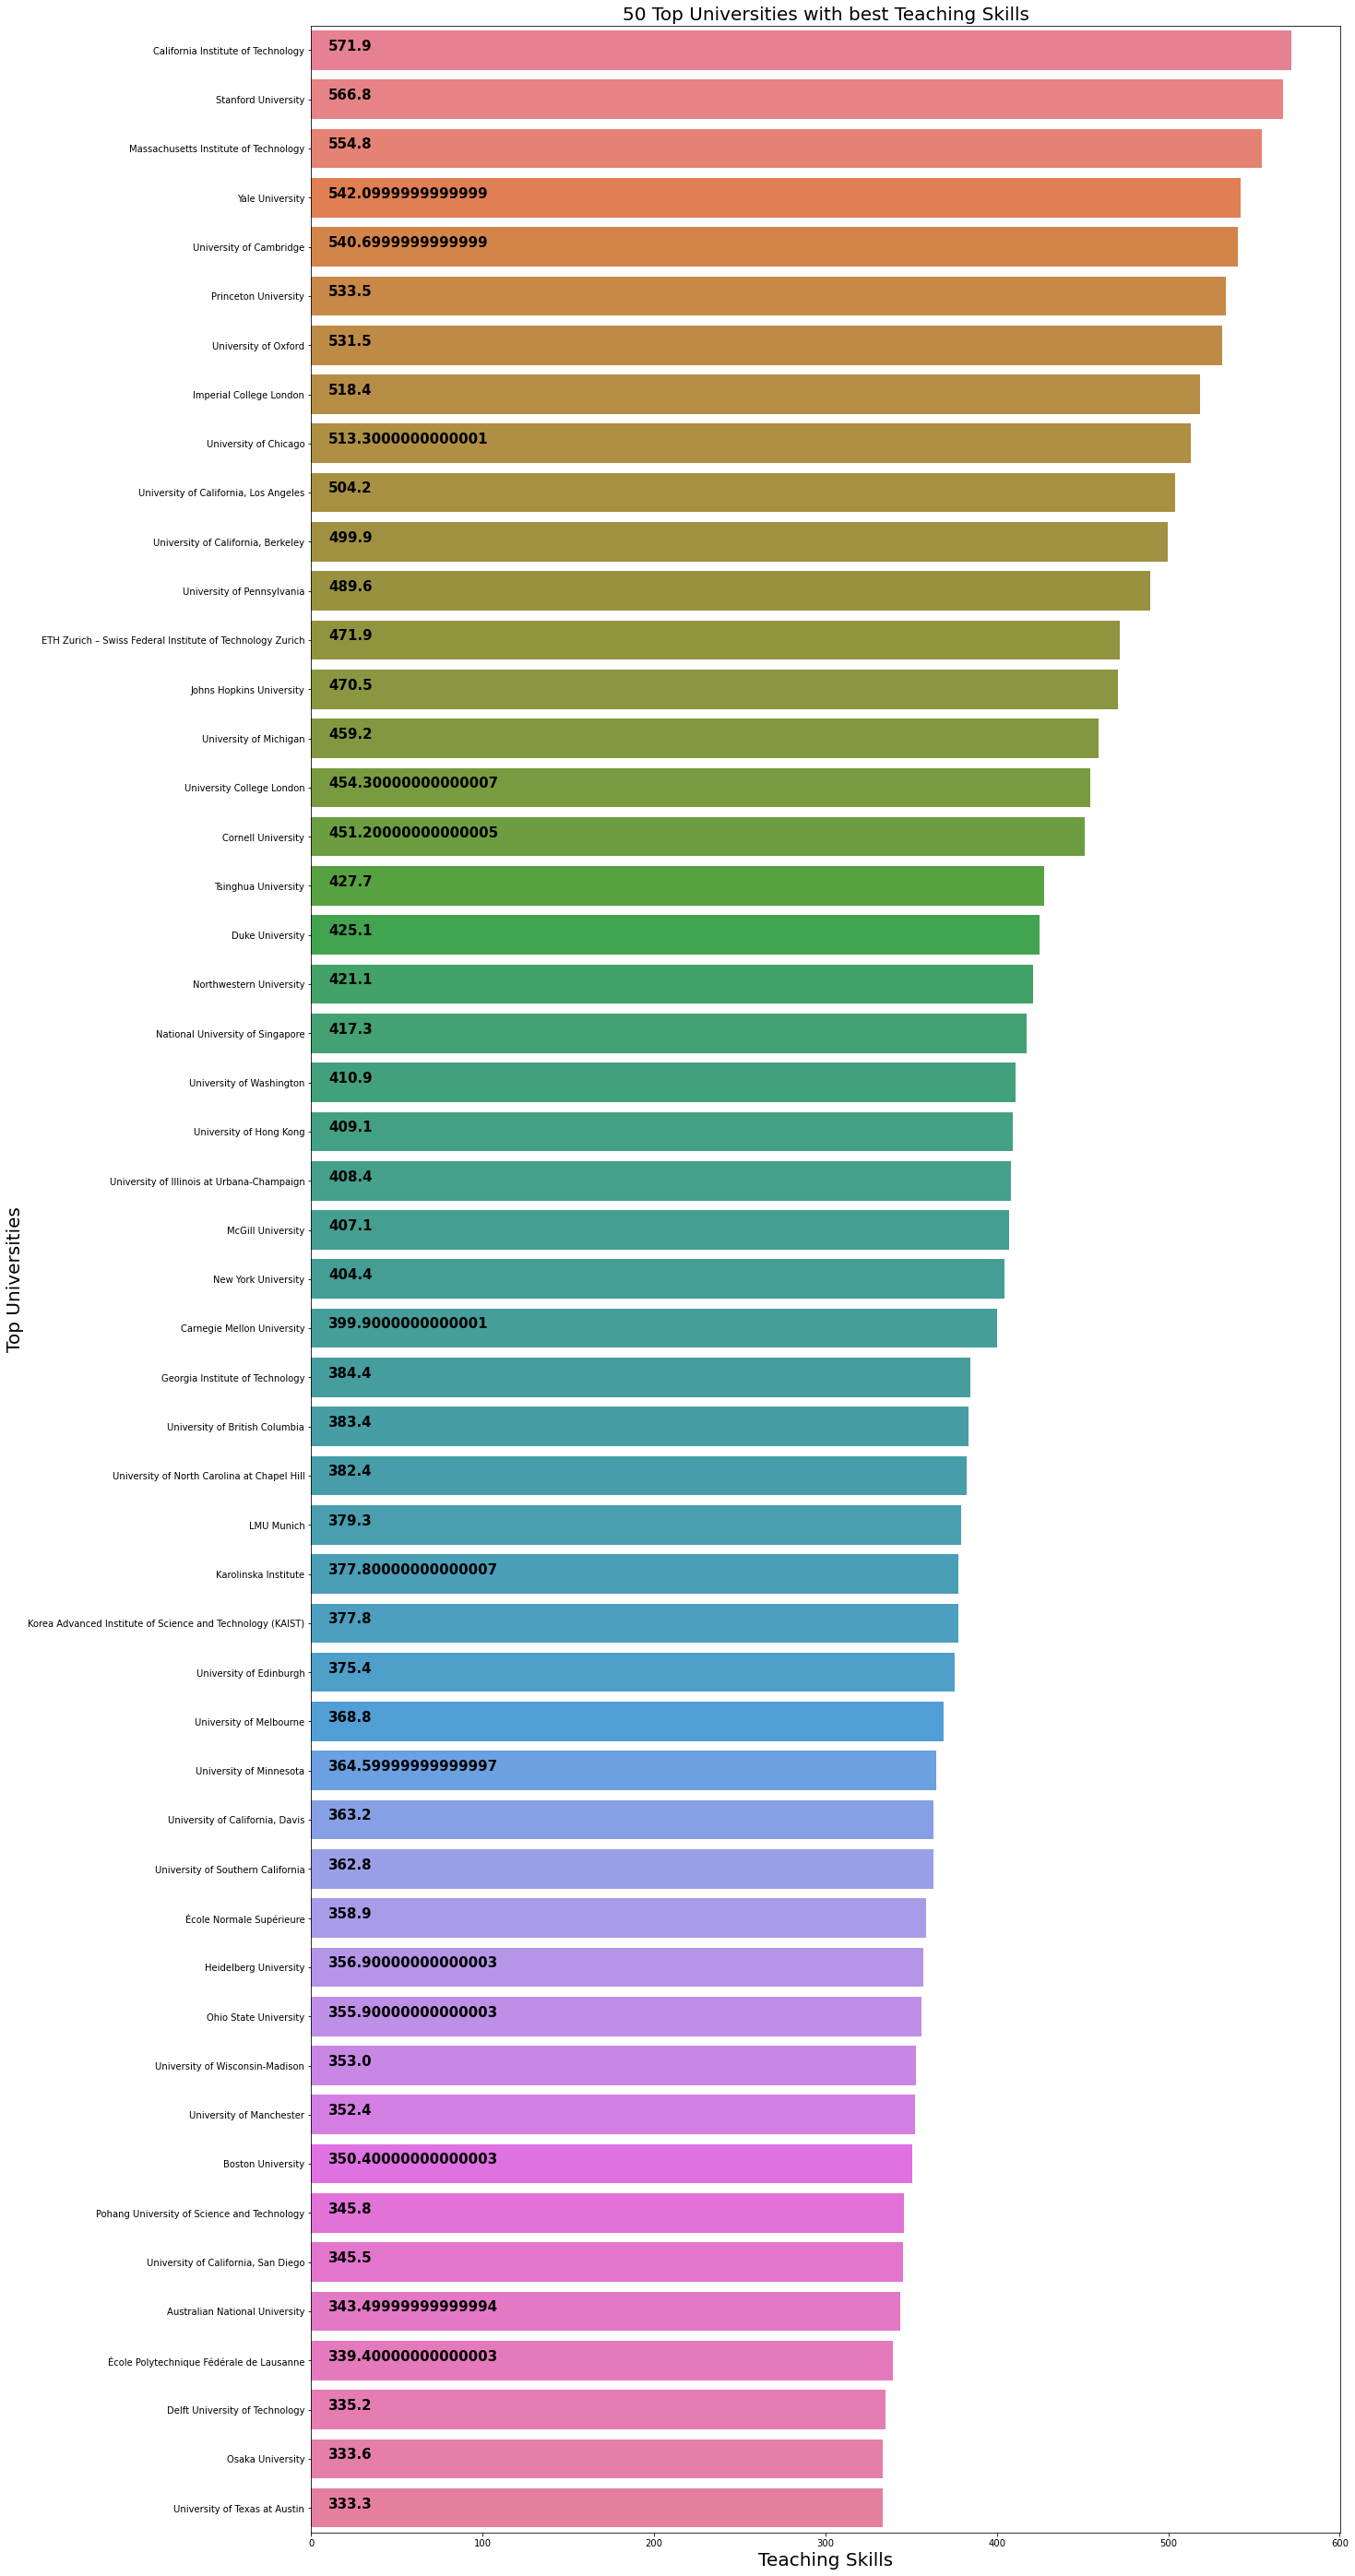

In [24]:
plt.figure(figsize=(20,50))
ax = sns.barplot(x = "teaching skills",y = "Top University",data= univ,palette = "husl",linewidth = 2,label = "big")
for i,j in enumerate(univ["teaching skills"]):
    ax.text(10,i,j,weight="bold",color = 'black',fontsize=15,ha ='left')
plt.title("50 Top Universities with best Teaching Skills", fontsize = 20)
ax.set_xlabel(xlabel = "Teaching Skills", fontsize = 20)
ax.set_ylabel(ylabel = "Top Universities", fontsize = 20)
plt.show()
del univ

In [25]:
## To see the top university with highest number of students intake.


topuniv =[]
for univer in data['university_name'].unique():
    df = data[data['university_name']==univer]
    sum=np.sum(df['num_students'])
    topuniv.append([univer,sum])
univer = pd.DataFrame(topuniv,columns=['Top University','Number of Students'])
univer.sort_values(by='Number of Students',ascending=False,inplace=True)

In [26]:
univer

,Top University,Number of Students
291,Sapienza University of Rome,604930
140,Arizona State University,499416
226,University of Bologna,427660
194,University of São Paulo,407010
127,Alexandria University,382293
...,...,...
437,Royal Veterinary College,1819
446,Gwangju Institute of Science and Technology,1394
449,Medical College of Wisconsin,1211
409,Scuola Normale Superiore di Pisa,924


In [27]:
data.shape

(2362, 14)

In [28]:
univer = univer[:51]

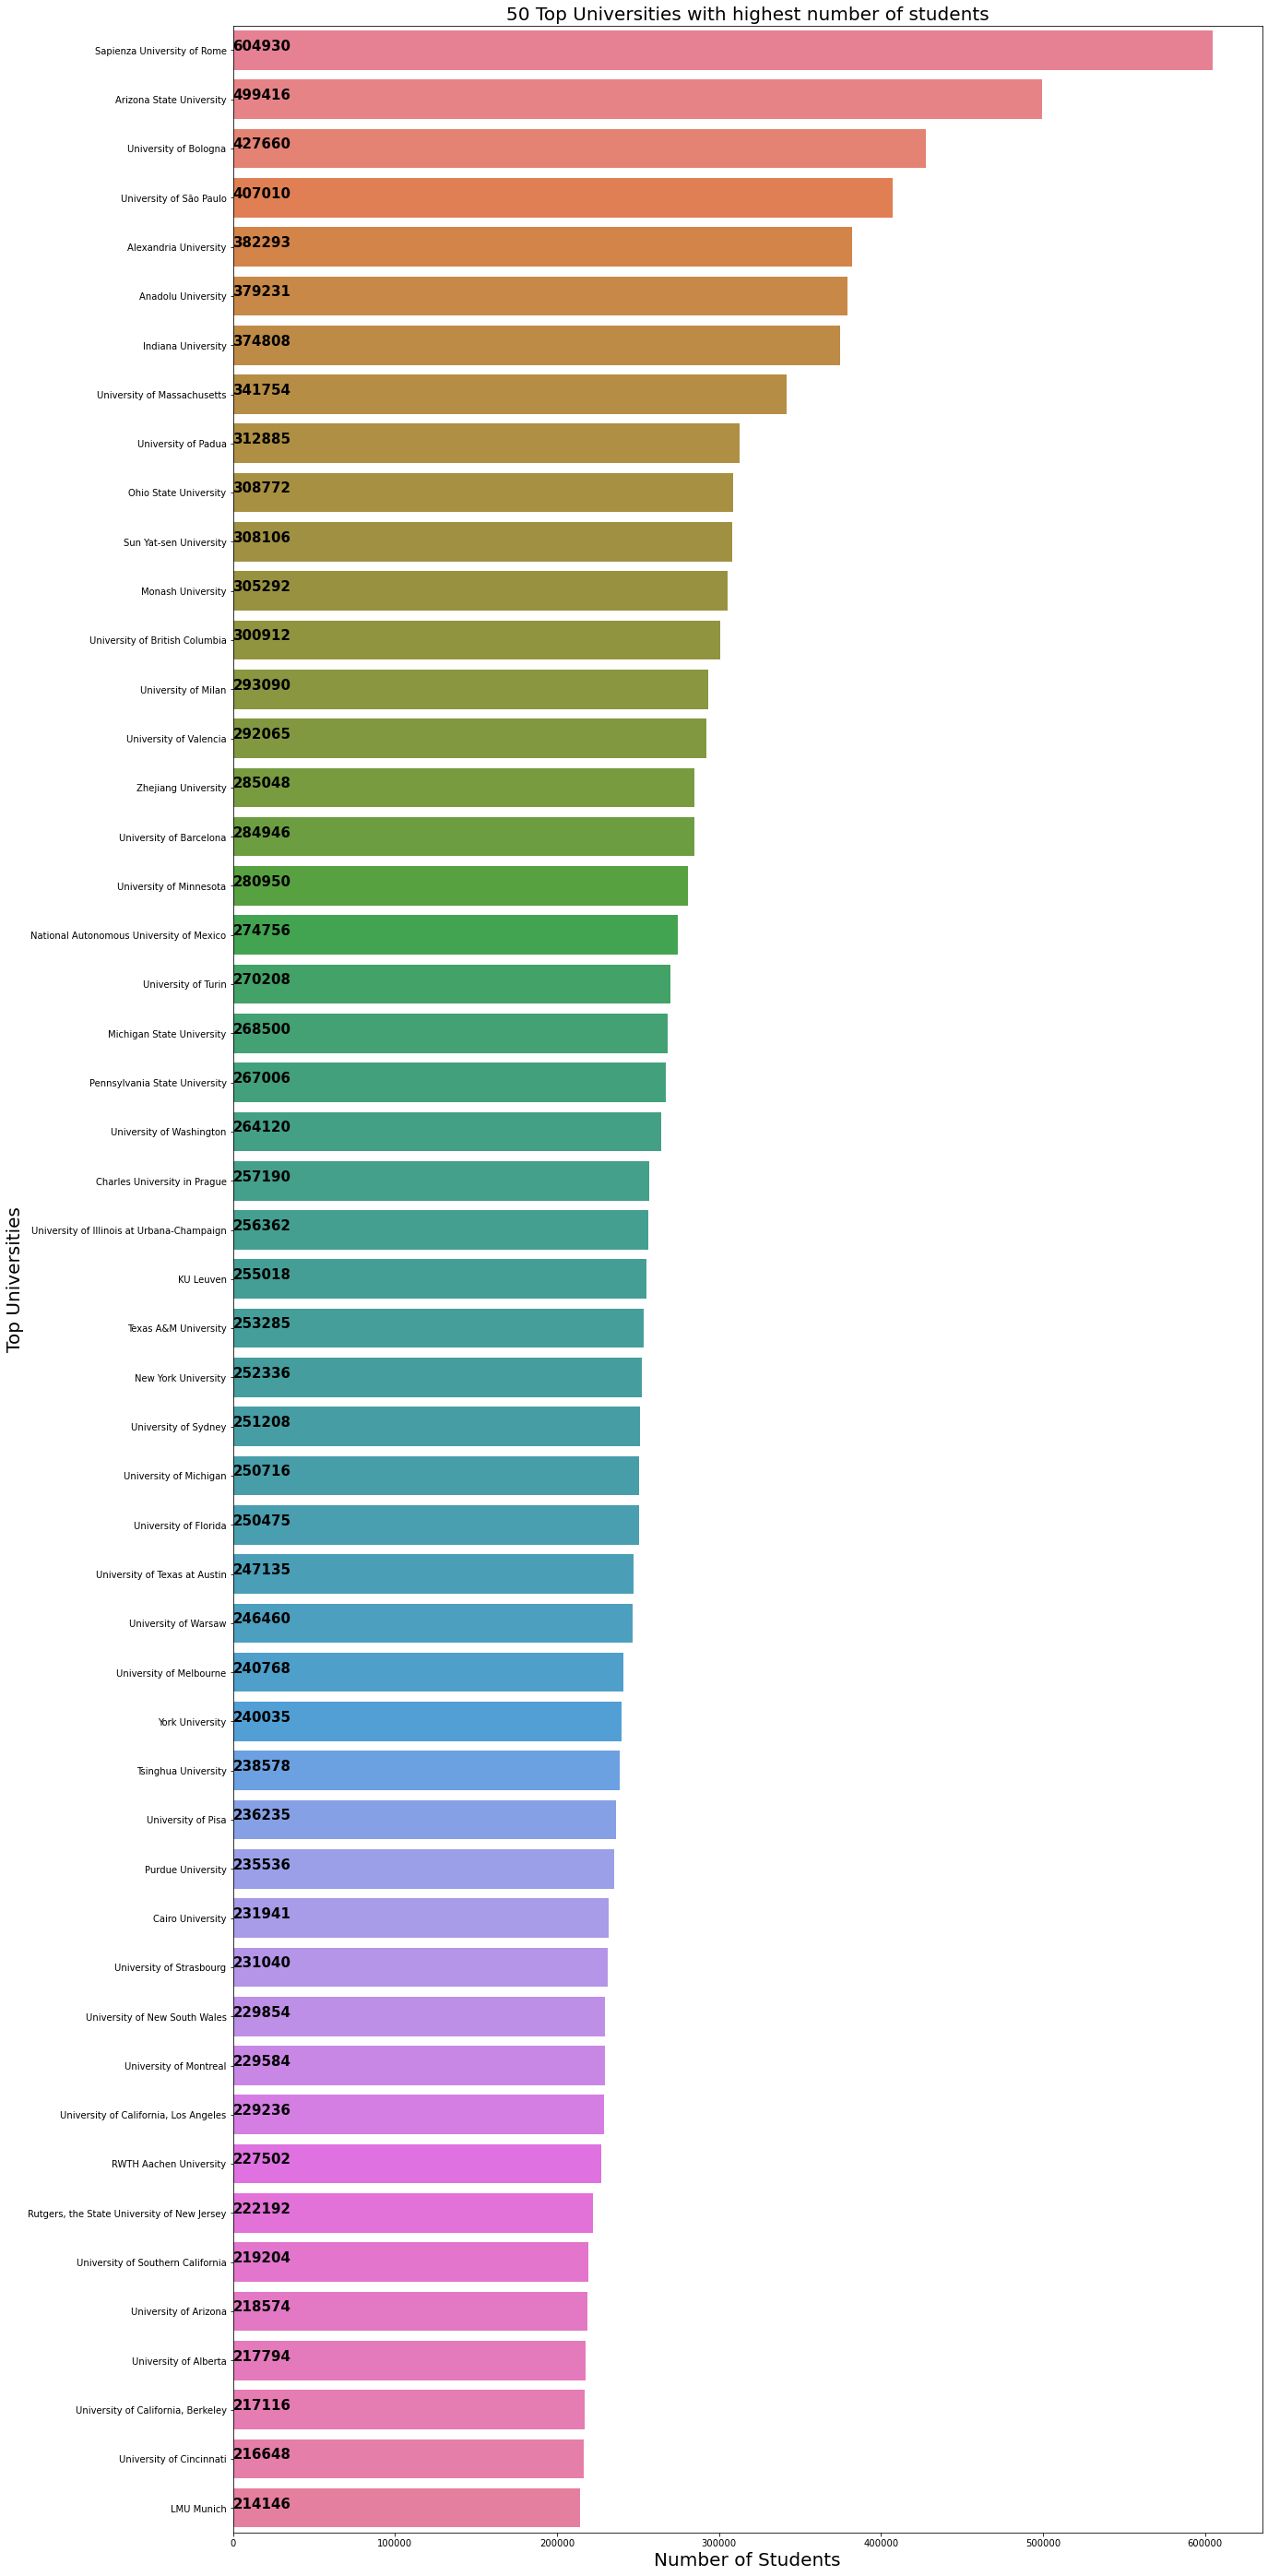

In [29]:
plt.figure(figsize=(20,50))
ax = sns.barplot(x = 'Number of Students',y = 'Top University',data= univer,palette = "husl",linewidth = 2,label = "big")
for i,j in enumerate(univer["Number of Students"]):
    ax.text(10,i,j,weight="bold",color = 'black',fontsize=15,ha ='left')
plt.title("50 Top Universities with highest number of students", fontsize = 20)
ax.set_xlabel(xlabel = "Number of Students", fontsize = 20)
ax.set_ylabel(ylabel = "Top Universities", fontsize = 20)
plt.show()
del univer

In [30]:
data['total_score'].unique()

array(['96', '95.6', '94.3', '94.2', '91.2', '91.1', '90.6', '89.5',
       '87.7', '86.9', '86.4', '83.9', '83.4', '79.5', '79.3', '79.2',
       '78.4', '78', '76.5', '75.9', '75.3', '75.1', '75', '73.8', '73.2',
       '73', '72.9', '71.7', '71', '69.5', '69.2', '68.6', '67', '66.9',
       '66.5', '66', '65.9', '65.6', '65.2', '65', '64.7', '64.2', '64',
       '63.9', '63', '62.8', '62.7', '62.2', '62.1', '61.6', '61.4',
       '61.2', '61.1', '60.7', '60.4', '60.3', '59.7', '59.6', '59.5',
       '59.1', '59', '58.9', '58', '57.9', '57.7', '57.6', '57.3', '57.2',
       '57.1', '57', '56.9', '56.6', '56.5', '56.4', '56.3', '56.2',
       '56.1', '56', '55.6', '55.4', '55.3', '55.2', '55.1', '55', '54.8',
       '54.6', '54.5', '54.4', '54.3', '54.2', '54', '53.4', '53.3',
       '52.7', '52.5', '52.4', '52.3', '52.2', '52.1', '52', '51.9',
       '51.8', '51.6', '51.4', '51.3', '51.2', '51.1', '51', '50.4',
       '50.3', '50.2', '50.1', '50', '49.9', '49.8', '49.7', '49.6',
    

In [31]:
##University that accepted highest number of research students.


topuniv =[]
for uni in data['university_name'].unique():
    df = data[data['university_name']==uni]
    sum=np.sum(df['research'])
    topuniv.append([uni,sum])
uni = pd.DataFrame(topuniv,columns=['Top University','Number of research students'])
uni.sort_values(by='Number of research students',ascending=False,inplace=True)

In [32]:
uni

,Top University,Number of research students
0,California Institute of Technology,589.5
2,Stanford University,585.5
5,University of Oxford,583.7
6,"University of California, Berkeley",583.3
3,Princeton University,578.1
...,...,...
642,Jordan University of Science and Technology,6.2
633,University of Huddersfield,5.4
733,West University of Timişoara,3.9
573,AGH University of Science and Technology,3.7


In [33]:
data.shape

(2362, 14)

In [34]:
uni = uni[:51]

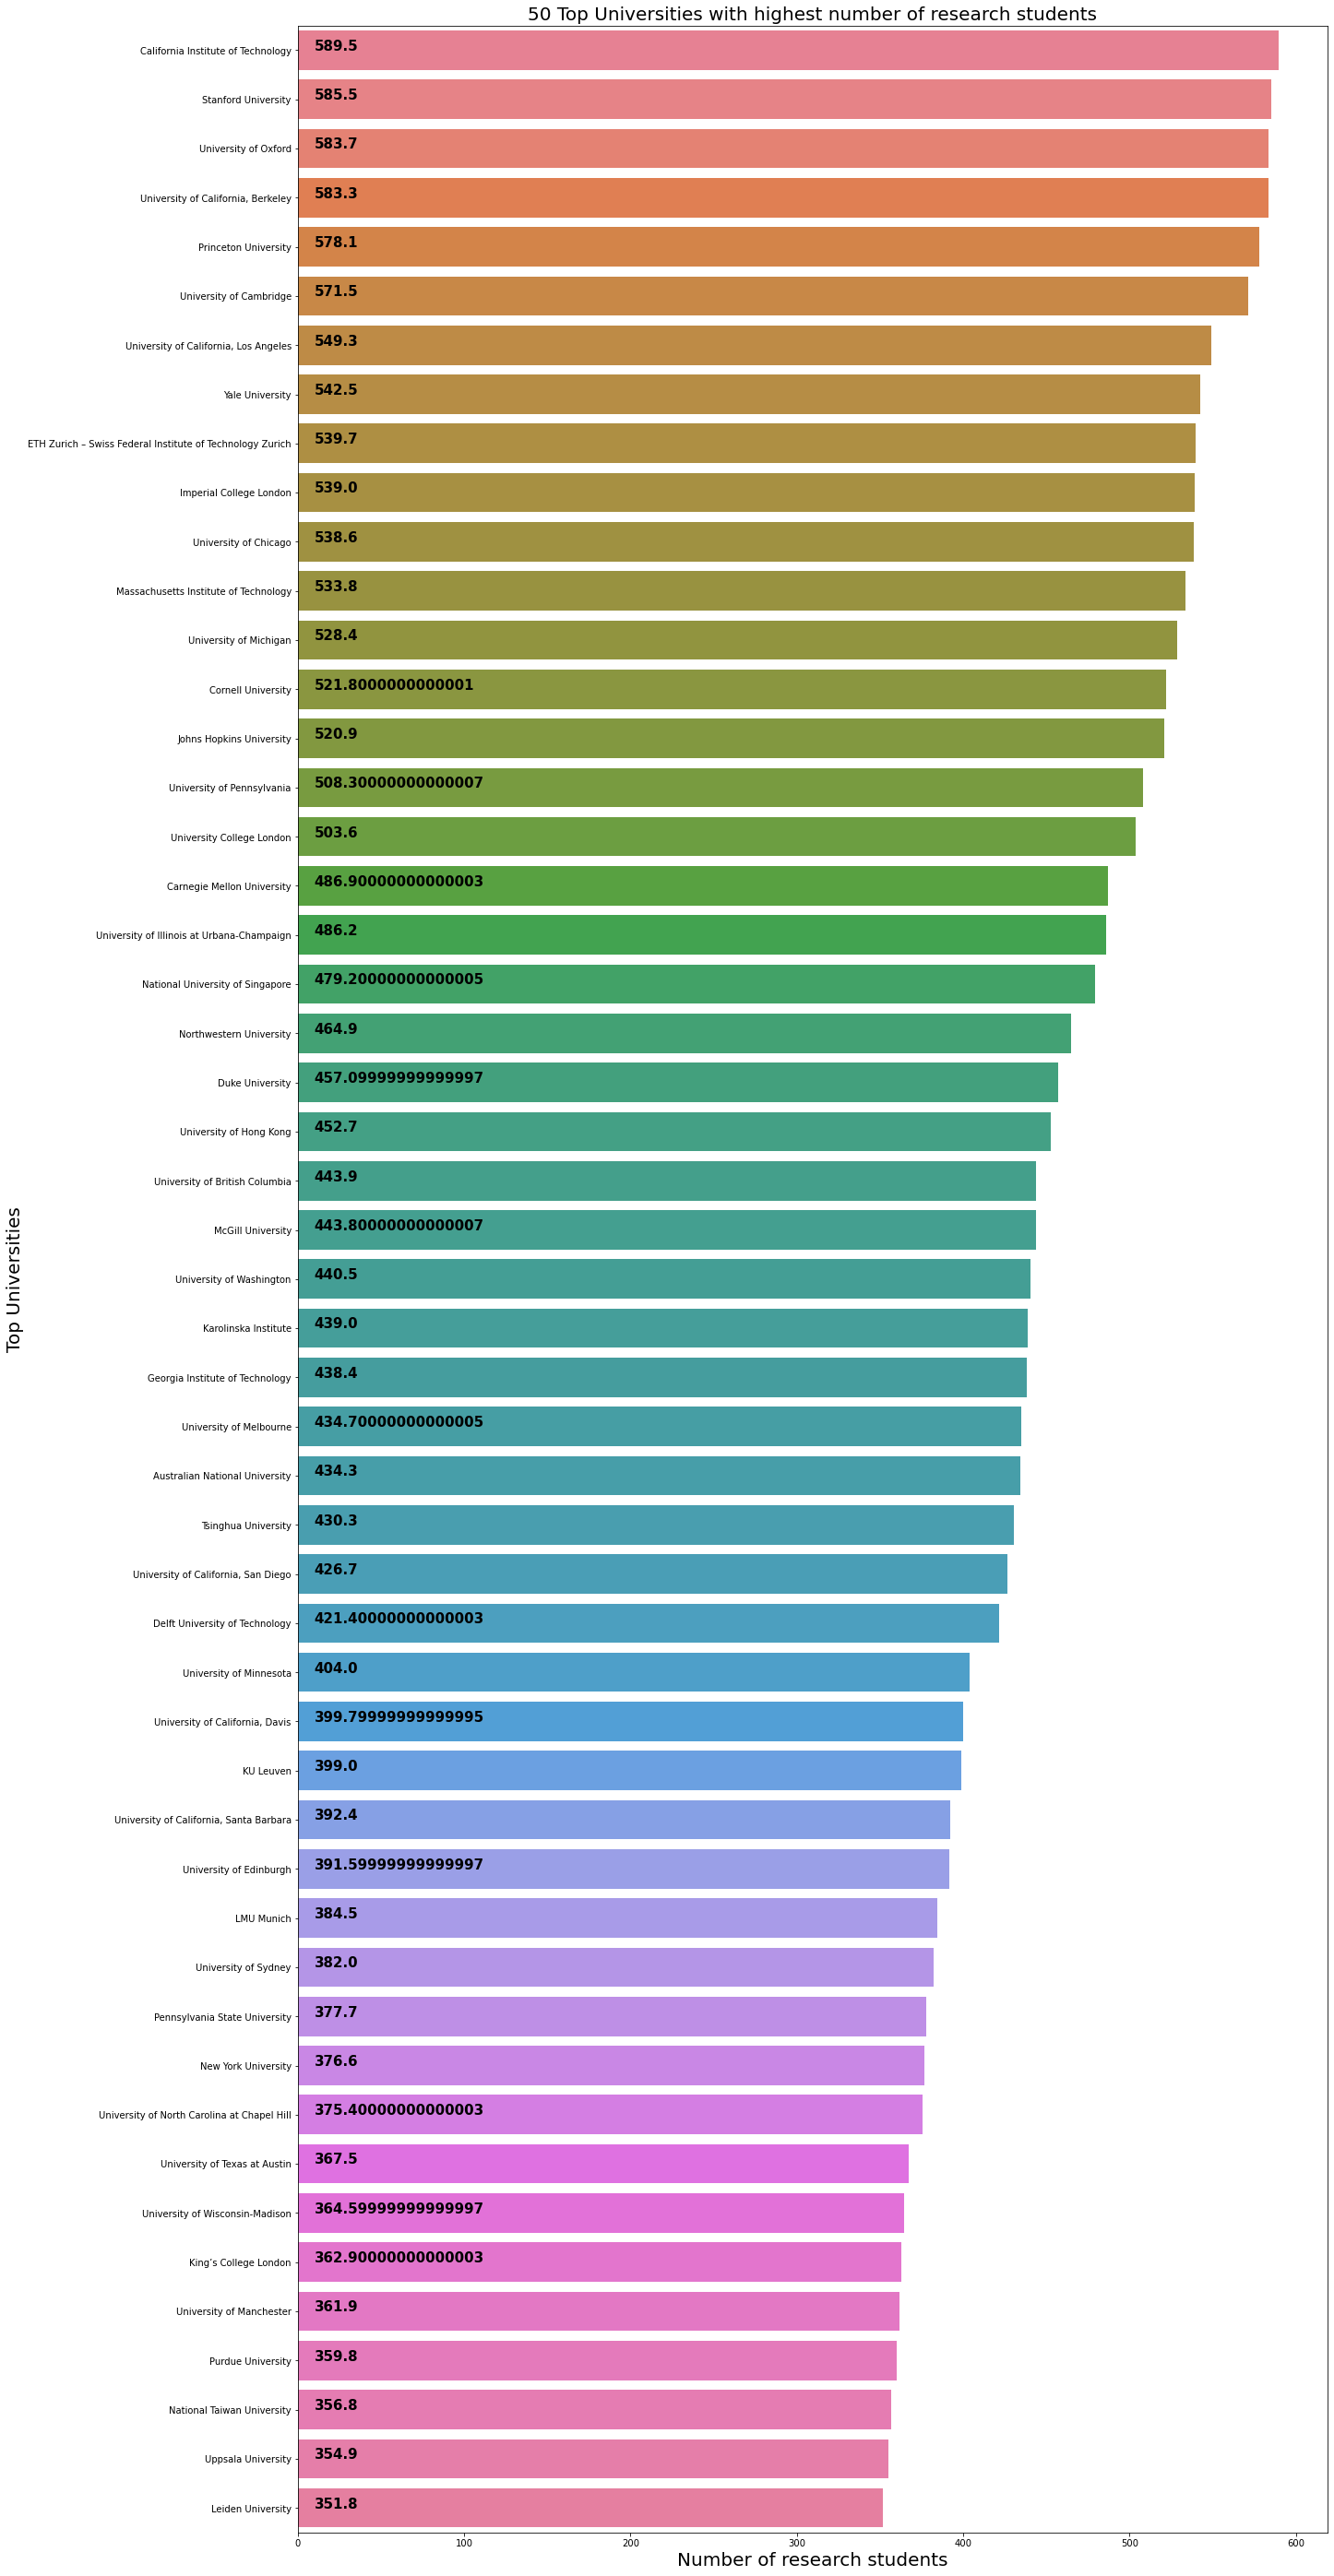

In [35]:
plt.figure(figsize=(20,50))
ax = sns.barplot(x = 'Number of research students',y = 'Top University',data= uni,palette = "husl",linewidth = 2,label = "big")
for i,j in enumerate(uni["Number of research students"]):
    ax.text(10,i,j,weight="bold",color = 'black',fontsize=15,ha ='left')
plt.title("50 Top Universities with highest number of research students", fontsize = 20)
ax.set_xlabel(xlabel = "Number of research students", fontsize = 20)
ax.set_ylabel(ylabel = "Top Universities", fontsize = 20)
plt.show()
del uni

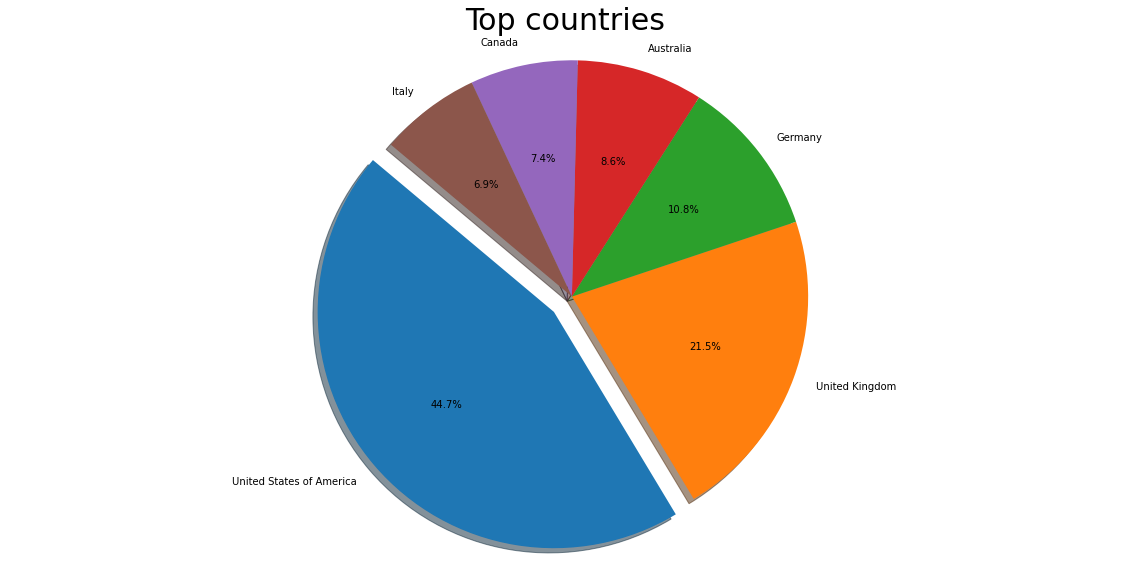

In [36]:
d = data[data['country']!='others']['country'].value_counts().head(6)
explode = (0.1,0,0,0,0,0)
fig1,ax1=plt.subplots(figsize=(20,10))
ax1.pie(d.values,explode=explode,labels=d.index,autopct ='%1.1f%%',shadow=True,startangle=140)
ax1.axis('equal')
plt.title("Top countries",fontsize=30)
plt.show()

In [37]:
## From the above pie chart we can conclude that the most of the top universities are in :UNITED STATES OF AMERICA , UNITED KINGDOM, and GERMANY.

Text(0.5, 1.0, 'Distribution of universities for research purpose across different countries')

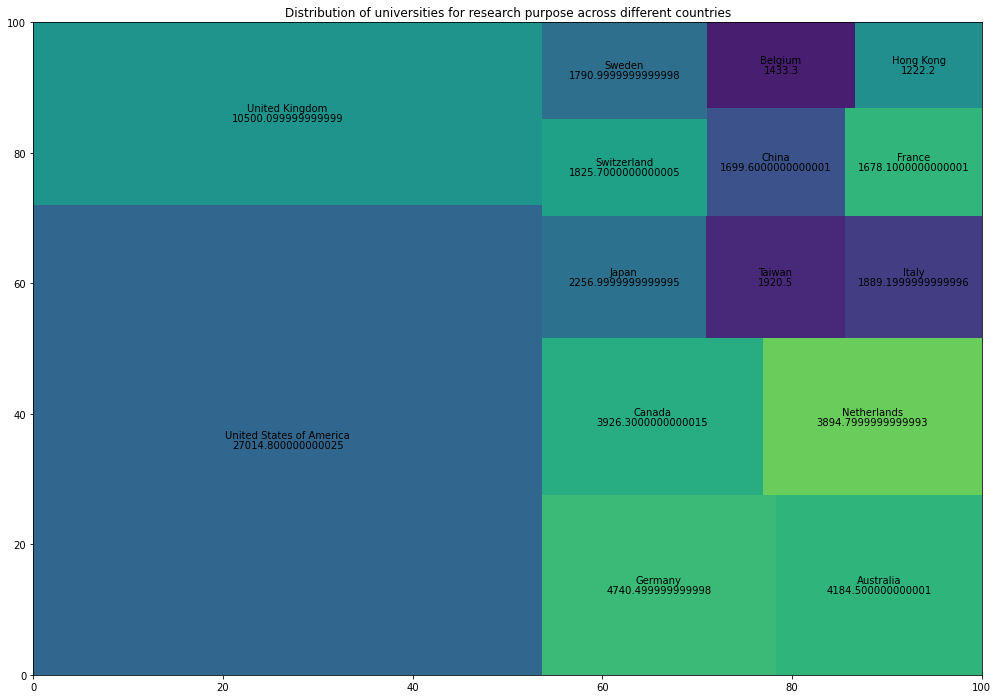

In [38]:
plt.figure(figsize=(17,12))
mean_amount = data.groupby('country').sum()['research'].sort_values(ascending=False).head(15)
squarify.plot(sizes=mean_amount.values,label=mean_amount.index,value=mean_amount.values)
plt.title("Distribution of universities for research purpose across different countries")

In [39]:
##United State of America is the most preferred country for Research related studies.

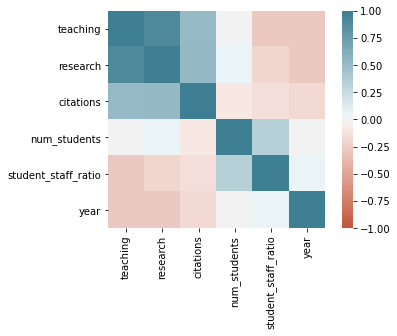

In [40]:
corr = data.corr()
ax = sns.heatmap(corr,
                vmin=-1,vmax=1,center=0,
                 cmap=sns.diverging_palette(20,220,n=200),
                 square = True
                )

In [41]:
data['country'].unique()

array(['United States of America', 'United Kingdom', 'Switzerland',
       'Hong Kong', 'South Korea', 'Canada', 'Singapore', 'Australia',
       'France', 'Sweden', 'Germany', 'China', 'Republic of Ireland',
       'Finland', 'Taiwan', 'South Africa', 'Japan', 'Netherlands',
       'Belgium', 'Denmark', 'Norway', 'Spain', 'New Zealand', 'Egypt',
       'Turkey', 'Austria', 'Israel', 'Brazil', 'Italy',
       'Russian Federation', 'Greece', 'Iceland', 'Czech Republic',
       'India', 'Poland', 'Iran', 'Portugal', 'Thailand', 'Estonia',
       'Saudi Arabia', 'Mexico', 'Colombia', 'Chile', 'Macau', 'Morocco',
       'Luxembourg', 'Cyprus', 'Uganda', 'Malaysia', 'Lebanon', 'Romania',
       'Pakistan', 'Hungary', 'United Arab Emirates', 'Belarus', 'Serbia',
       'Slovakia', 'Bangladesh', 'Ghana', 'Nigeria', 'Indonesia',
       'Jordan', 'Latvia', 'Slovenia', 'Kenya', 'Argentina', 'Qatar',
       'Oman', 'Ukraine', 'Lithuania'], dtype=object)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
data.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

In [44]:
v = TfidfVectorizer(stop_words='english',analyzer = 'word', max_features=500)
x = v.fit_transform(data['country'])

In [45]:
data.reset_index(drop=True,inplace=True)

In [46]:
t=x.toarray()

In [47]:
dt=pd.DataFrame(t)

In [48]:
dt

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,0.0,0.609047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.609047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.508058,0.0
1,0.0,0.609047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.609047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.508058,0.0
2,0.0,0.609047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.609047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.508058,0.0
3,0.0,0.609047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.609047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.508058,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.537895,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2358,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2359,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0
2360,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [49]:
df=pd.concat([data,dt],axis=1)

In [50]:
from sklearn import preprocessing

In [51]:
le = preprocessing.LabelEncoder()

In [52]:
df['university_name']=le.fit_transform(df['university_name'])
df['teaching']=le.fit_transform(df['teaching'])
df['num_students']=le.fit_transform(df['num_students'])
df['international']=le.fit_transform(df['international'])
df['research']=le.fit_transform(df['research'])

In [53]:
df.drop(labels=['citations','country','income','total_score','student_staff_ratio','international_students','female_male_ratio','year'],inplace=True,axis=1)

In [54]:
df

,world_rank,university_name,teaching,international,research,num_students,0,1,2,3,...,69,70,71,72,73,74,75,76,77,78
0,2,48,635,400,698,9,0.0,0.609047,0.0,0.0,...,0.609047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.508058,0.0
1,3,222,636,661,675,157,0.0,0.609047,0.0,0.0,...,0.609047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.508058,0.0
2,4,368,637,154,699,271,0.0,0.609047,0.0,0.0,...,0.609047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.508058,0.0
3,5,318,618,554,689,77,0.0,0.609047,0.0,0.0,...,0.609047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.508058,0.0
4,6,475,616,617,683,344,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.537895,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,601-800,724,53,4,54,576,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2358,601-800,728,60,104,42,412,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2359,601-800,732,20,17,11,571,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0
2360,601-800,729,75,95,92,124,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
